In [2]:
import numpy as np
z = np.arange(-10, 10, 0.01)
g = 1/(1+np.exp(-z))


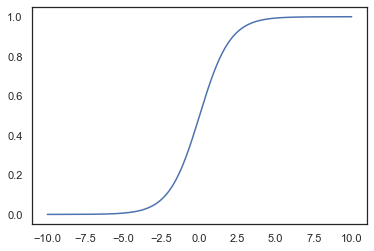

In [6]:
import matplotlib.pyplot as plt

plt.plot(z,g);

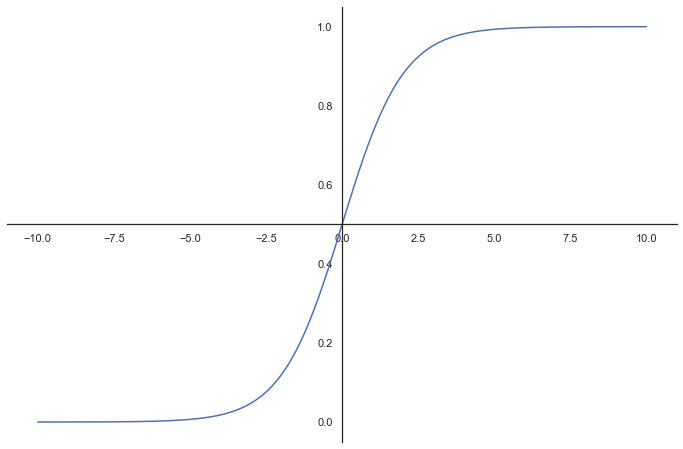

In [11]:
plt.figure(figsize=(12,8))
ax=plt.gca()

ax.plot(z,g)
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('center')
ax.spines['top'].set_color('none')

plt.show()

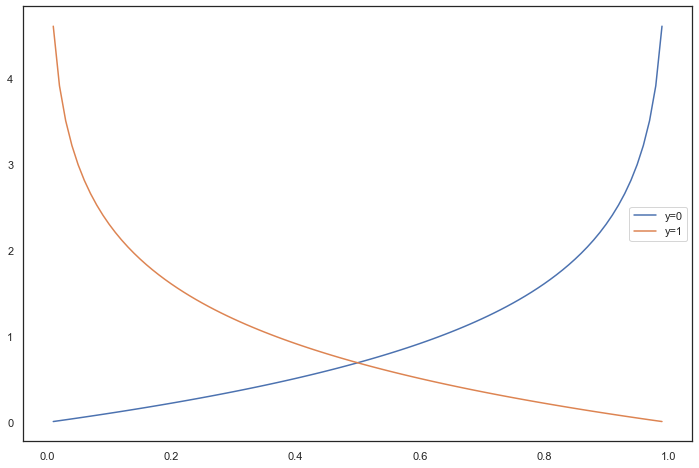

In [15]:
#logistic reg cost fcn
h=np.arange(0.01, 1, 0.01)

c0= -np.log(1-h)
c1= -np.log(h)
plt.figure(figsize=(12,8))
plt.plot(h, c0, label='y=0')
plt.plot(h, c1, label='y=1')
plt.legend()

plt.show()

In [19]:
wine= pd.read_csv('data/wine.csv', index_col=0)
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [21]:
wine['taste']=[1. if grade>5 else 0. for grade in wine['quality']]

X=wine.drop(['taste', 'quality'], axis=1)
y= wine['taste']

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state =13)

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

Ir= LogisticRegression(solver ='liblinear', random_state=13)
Ir.fit(X_train, y_train)

y_pred_tr= Ir.predict(X_train)
y_pred_test = Ir.predict(X_test)

accuracy_score(y_train, y_pred_tr),accuracy_score(y_test, y_pred_test)

(0.7427361939580527, 0.7438461538461538)

In [64]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

estimators=[('scaler', StandardScaler()),
           ('clf', LogisticRegression(solver="liblinear", random_state=13))]
Pipeline(estimators)

Pipeline(steps=[('scaler', StandardScaler()),
                ('clf',
                 LogisticRegression(random_state=13, solver='liblinear'))])

In [65]:
pipe_lr=pipe.fit(X_train, y_train)

In [66]:
y_pred_tr= pipe.predict(X_train)
y_pred_test=pipe.predict(X_test)
accuracy_score(y_train, y_pred_tr), accuracy_score(y_pred_test, y_test)

(0.7444679622859341, 0.7469230769230769)

In [67]:
from sklearn.tree import DecisionTreeClassifier
wine_tree = DecisionTreeClassifier(max_depth=2, random_state=13)
wine_tree.fit(X_train, y_train )
models={"logistics regression":pipe_lr, "decision tree":wine_tree}

In [68]:
models

{'logistics regression': Pipeline(steps=[('scaler', StandardScaler()),
                 ('clf',
                  LogisticRegression(random_state=13, solver='liblinear'))]),
 'decision tree': DecisionTreeClassifier(max_depth=2, random_state=13)}

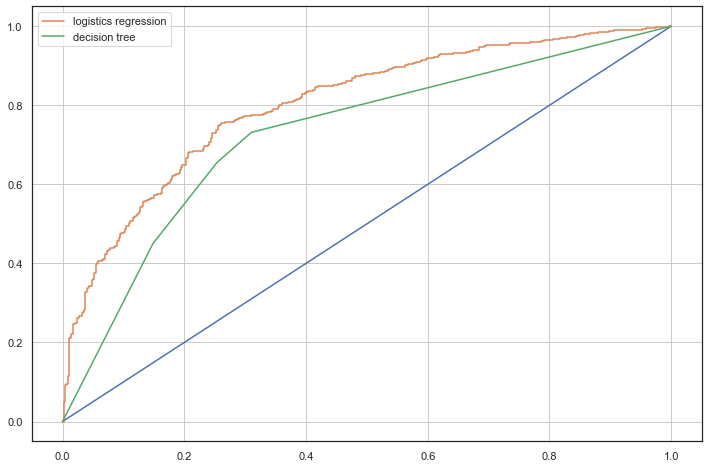

In [69]:
from sklearn.metrics import roc_curve
plt.figure(figsize=(12,8))
plt.plot([0,1],[0,1])
for model_name, model in models.items():
    pred = model.predict_proba(X_test)[:,1]
    fpr, tpr, threshholds = roc_curve(y_test, pred)
    plt.plot(fpr, tpr, label=model_name)
plt.grid()
plt.legend()
plt.show()